In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys 
sys.path.append(os.path.abspath("../../../src"))   
import soporte_preprocesamiento as f
import warnings
warnings.filterwarnings("ignore")




# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor



from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler


from tqdm import tqdm


# import plotly_express as px


# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon

# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product, combinations
pd.set_option("display.max_columns", None)


In [2]:
df_escaldo=pd.read_csv("..\..\..\datos\datos1\datos_clusterizados1_escalado.csv", index_col=0)


In [3]:
df_escaldo.head(2)

,Sales_unitario,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Quantity_entre 1 y 2,Quantity_entre 11 y 12,Quantity_entre 13 y 14,Quantity_entre 13 y14,Quantity_entre 3 y 4,Quantity_entre 5 y 6,Quantity_entre 7 y 8,Quantity_entre 9 y 10,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,City_standard,Category_standard,Sub-Category_standard,Discount_standard
0,307.953333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.334497,1.672617,-0.004291,-0.793320
1,497.445818,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.255158,1.672617,0.536741,0.180164


Como ya vimos, nuestras columnas numéricas eran Sales_unitarios y Discount y ambas cuentan con outliers 

Dado que no tienen una distribución normal ninguna de ellas, no utilizaré el Z-Score ya que el porcentaje de fallo será demasiado alto. Por ello opto por el IQR

In [4]:
dicc_iqr=f.identificar_outliers_iqr(df_escaldo)

La columna SALES_UNITARIO tiene 493 outliers
La columna SHIP MODE_FIRST CLASS tiene 689 outliers
La columna SHIP MODE_SAME DAY tiene 241 outliers
La columna SHIP MODE_SECOND CLASS tiene 873 outliers
La columna SHIP MODE_STANDARD CLASS tiene 0 outliers
La columna SEGMENT_CONSUMER tiene 0 outliers
La columna SEGMENT_CORPORATE tiene 0 outliers
La columna SEGMENT_HOME OFFICE tiene 796 outliers
La columna QUANTITY_ENTRE 1 Y 2 tiene 0 outliers
La columna QUANTITY_ENTRE 11 Y 12 tiene 30 outliers
La columna QUANTITY_ENTRE 13 Y 14 tiene 12 outliers
La columna QUANTITY_ENTRE 13 Y14 tiene 15 outliers
La columna QUANTITY_ENTRE 3 Y 4 tiene 0 outliers
La columna QUANTITY_ENTRE 5 Y 6 tiene 795 outliers
La columna QUANTITY_ENTRE 7 Y 8 tiene 360 outliers
La columna QUANTITY_ENTRE 9 Y 10 tiene 150 outliers
La columna ORDER PRIORITY_CRITICAL tiene 338 outliers
La columna ORDER PRIORITY_HIGH tiene 0 outliers
La columna ORDER PRIORITY_LOW tiene 192 outliers
La columna ORDER PRIORITY_MEDIUM tiene 0 outliers

Realmente dado que la única variable numércia con outliers es la variable respuesta, creo que no tiene sentido comparar con el restode variables (outliers multivariados) sino que simplemente habrá que tratar los univariados

In [5]:
dicc_iqr["Sales_unitario"].head(2)

,Sales_unitario,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Quantity_entre 1 y 2,Quantity_entre 11 y 12,Quantity_entre 13 y 14,Quantity_entre 13 y14,Quantity_entre 3 y 4,Quantity_entre 5 y 6,Quantity_entre 7 y 8,Quantity_entre 9 y 10,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,City_standard,Category_standard,Sub-Category_standard,Discount_standard
0,307.953333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.334497,1.672617,-0.004291,-0.793320
1,497.445818,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.255158,1.672617,0.536741,0.180164


In [7]:
dicc_iqr["Discount_standard"].head(2)

,Sales_unitario,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Quantity_entre 1 y 2,Quantity_entre 11 y 12,Quantity_entre 13 y 14,Quantity_entre 13 y14,Quantity_entre 3 y 4,Quantity_entre 5 y 6,Quantity_entre 7 y 8,Quantity_entre 9 y 10,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,City_standard,Category_standard,Sub-Category_standard,Discount_standard
58,277.306909,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.50912,-0.777391,-0.404991,3.100617
88,358.796000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.72466,-0.777391,-0.404991,2.613875


Nos percatamos anteriormente que hay algunos outliers que no tienen sentido (Ej:binders)

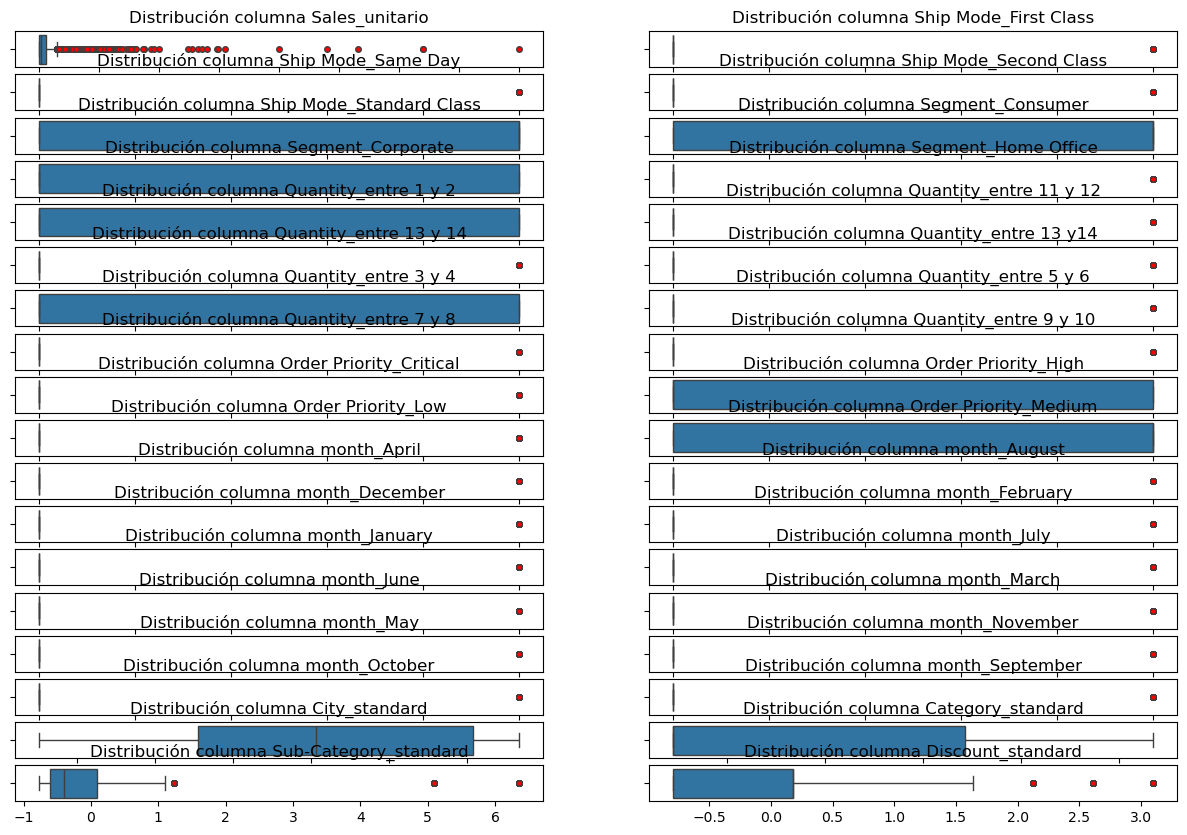

In [8]:
f.plot_outliers_univariados(df_escaldo, "b", (15,10))

In [9]:
df_escaldo[df_escaldo["Discount_standard"] > 2].shape

(382, 36)

In [20]:
df_escaldo[df_escaldo["Discount_standard"] > 2].sample(5)

,Sales_unitario,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Quantity_entre 1 y 2,Quantity_entre 11 y 12,Quantity_entre 13 y 14,Quantity_entre 13 y14,Quantity_entre 3 y 4,Quantity_entre 5 y 6,Quantity_entre 7 y 8,Quantity_entre 9 y 10,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,City_standard,Category_standard,Sub-Category_standard,Discount_standard
2459,10.510105,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.72466,-0.777391,-0.404991,2.613875
58,277.306909,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.50912,-0.777391,-0.404991,3.100617
2509,9.078857,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.74334,0.712590,-0.502876,2.127133
2168,20.794286,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.74334,0.712590,-0.502876,2.127133
4438,1.816000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.50912,-0.777391,-0.404991,3.100617


Por lo que se ve, hacen los mayores descuentos a los productos más baratos lo que no termina de tener sentido

In [10]:
df_escaldo[df_escaldo["Sales_unitario"] > 800]

,Sales_unitario,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Quantity_entre 1 y 2,Quantity_entre 11 y 12,Quantity_entre 13 y 14,Quantity_entre 13 y14,Quantity_entre 3 y 4,Quantity_entre 5 y 6,Quantity_entre 7 y 8,Quantity_entre 9 y 10,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,City_standard,Category_standard,Sub-Category_standard,Discount_standard
4,871.536000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.334497,-0.777391,-0.404991,0.180164
6,1326.800000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.334497,1.672617,5.099690,-0.793320
11,1999.988571,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.334497,1.672617,5.099690,-0.793320
12,2399.993143,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.724660,1.672617,6.358428,1.153648
14,1279.085714,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.749622,1.672617,5.099690,0.180164
28,874.280571,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.509120,1.672617,5.099690,1.153648
52,2661.320000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.334497,1.672617,5.099690,-0.793320
72,998.444000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.032984,0.712590,1.106759,-0.063207
86,1485.702857,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.334497,1.672617,5.099690,-0.793320
97,933.250286,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.040086,-0.777391,-0.404991,0.180164


No tiene sentido que haya carpetas (binders) que por comprar 1 unidad te cobren 1244 dólares al no ser que esa unidad sea un paquete de 100 carpetas o algo así y no parece porque en segmento hay tanto corporate (que tendría sentido) como consumer (que es donde ya no tiene tanto sentido)

In [11]:
df_escaldo[df_escaldo["Sales_unitario"] > 300].sample(4)

,Sales_unitario,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Quantity_entre 1 y 2,Quantity_entre 11 y 12,Quantity_entre 13 y 14,Quantity_entre 13 y14,Quantity_entre 3 y 4,Quantity_entre 5 y 6,Quantity_entre 7 y 8,Quantity_entre 9 y 10,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,City_standard,Category_standard,Sub-Category_standard,Discount_standard
34,653.324000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.116157,1.672617,6.358428,-0.793320
320,667.722667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.255158,1.672617,0.536741,0.180164
21,411.421714,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.016893,1.672617,6.358428,1.153648
361,318.986667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.116157,0.712590,1.049028,0.180164


In [12]:
df_escaldo[df_escaldo["Sales_unitario"] > 300].shape

(172, 36)

In [13]:
df_escaldo[df_escaldo["Sales_unitario"] < 300].sample(3)

,Sales_unitario,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Quantity_entre 1 y 2,Quantity_entre 11 y 12,Quantity_entre 13 y 14,Quantity_entre 13 y14,Quantity_entre 3 y 4,Quantity_entre 5 y 6,Quantity_entre 7 y 8,Quantity_entre 9 y 10,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,City_standard,Category_standard,Sub-Category_standard,Discount_standard
3365,9.785143,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032984,-0.777391,-0.404991,0.180164
889,58.163636,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.016893,-0.777391,-0.404991,-0.793320
983,44.463636,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.016893,-0.777391,-0.607304,-0.793320


Estos precios de carpetas (binders) si que tienen sentido (ej:8.21 etc)

In [14]:
(df_escaldo["Sales_unitario"] <300).sum()

4363

In [15]:
(df_escaldo["Sales_unitario"] >300).sum()

172

In [16]:
df_escaldo.shape

(4535, 36)

In [21]:
contaminacion= [0.01, 0.05, 0.1]
estimadores = [100,400,1000, 2000] 
combinaciones= list(product(contaminacion, estimadores))
for cont, esti in combinaciones:
    
    ifo=IsolationForest(random_state=42, n_estimators=esti, contamination= cont, n_jobs=-1)         #n_estimator es el número de árboles y n_jobs con -1 coge todos los nucleos del ordenador

    df_escaldo[f"outliers_ifo_{cont}_{esti}"]=ifo.fit_predict(df_escaldo[["Sales_unitario","Discount_standard"]]) 

In [22]:
df_escaldo["outliers_ifo_0.01_100"].value_counts(normalize=True)    #Esto nos muetsra como se acerca mucho al 1% de outliers por el nivel de contaminación ser 0.01

outliers_ifo_0.01_100
 1    0.989857
-1    0.010143
Name: proportion, dtype: float64

In [23]:
df_escaldo.head()

,Sales_unitario,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Quantity_entre 1 y 2,Quantity_entre 11 y 12,Quantity_entre 13 y 14,Quantity_entre 13 y14,Quantity_entre 3 y 4,Quantity_entre 5 y 6,Quantity_entre 7 y 8,Quantity_entre 9 y 10,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,City_standard,Category_standard,Sub-Category_standard,Discount_standard,outliers_ifo_0.01_100,outliers_ifo_0.01_400,outliers_ifo_0.01_1000,outliers_ifo_0.01_2000,outliers_ifo_0.05_100,outliers_ifo_0.05_400,outliers_ifo_0.05_1000,outliers_ifo_0.05_2000,outliers_ifo_0.1_100,outliers_ifo_0.1_400,outliers_ifo_0.1_1000,outliers_ifo_0.1_2000
0,307.953333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.334497,1.672617,-0.004291,-0.793320,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
1,497.445818,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.255158,1.672617,0.536741,0.180164,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,554.521600,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.032984,1.672617,0.536741,0.180164,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
3,799.988571,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.334497,1.672617,5.099690,-0.793320,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,871.536000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.334497,-0.777391,-0.404991,0.180164,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [24]:
columnas_hue=df_escaldo.filter(like="outliers")

In [25]:
df_escaldo.head()

,Sales_unitario,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Quantity_entre 1 y 2,Quantity_entre 11 y 12,Quantity_entre 13 y 14,Quantity_entre 13 y14,Quantity_entre 3 y 4,Quantity_entre 5 y 6,Quantity_entre 7 y 8,Quantity_entre 9 y 10,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,City_standard,Category_standard,Sub-Category_standard,Discount_standard,outliers_ifo_0.01_100,outliers_ifo_0.01_400,outliers_ifo_0.01_1000,outliers_ifo_0.01_2000,outliers_ifo_0.05_100,outliers_ifo_0.05_400,outliers_ifo_0.05_1000,outliers_ifo_0.05_2000,outliers_ifo_0.1_100,outliers_ifo_0.1_400,outliers_ifo_0.1_1000,outliers_ifo_0.1_2000
0,307.953333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.334497,1.672617,-0.004291,-0.793320,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
1,497.445818,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.255158,1.672617,0.536741,0.180164,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,554.521600,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.032984,1.672617,0.536741,0.180164,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
3,799.988571,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.334497,1.672617,5.099690,-0.793320,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,871.536000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.334497,-0.777391,-0.404991,0.180164,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1



Para poder comparar más fácil voy a sacar IFO y LOF juntos.

100%|██████████| 21/21 [00:01<00:00, 13.70it/s]


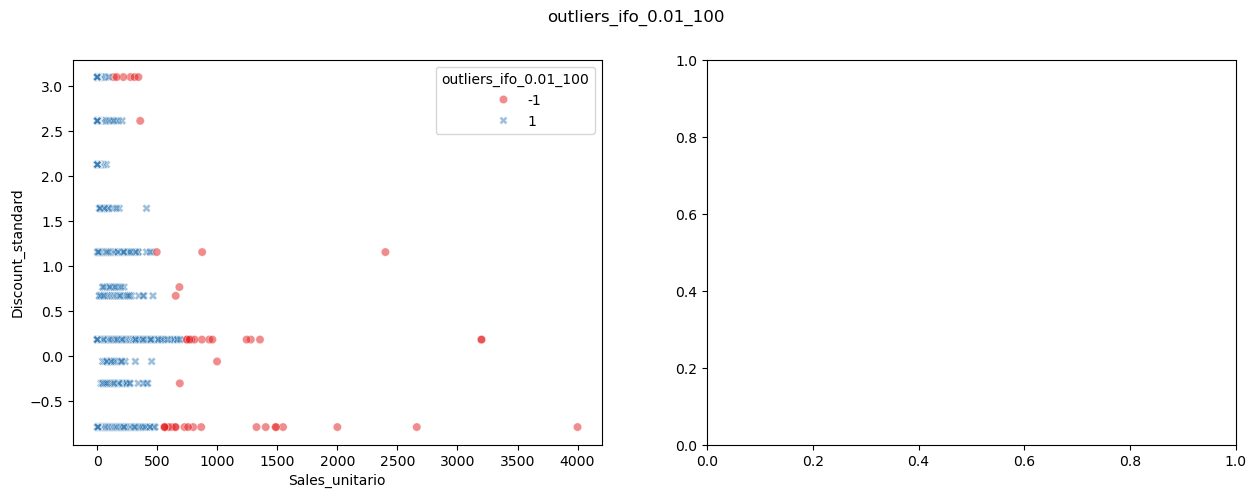

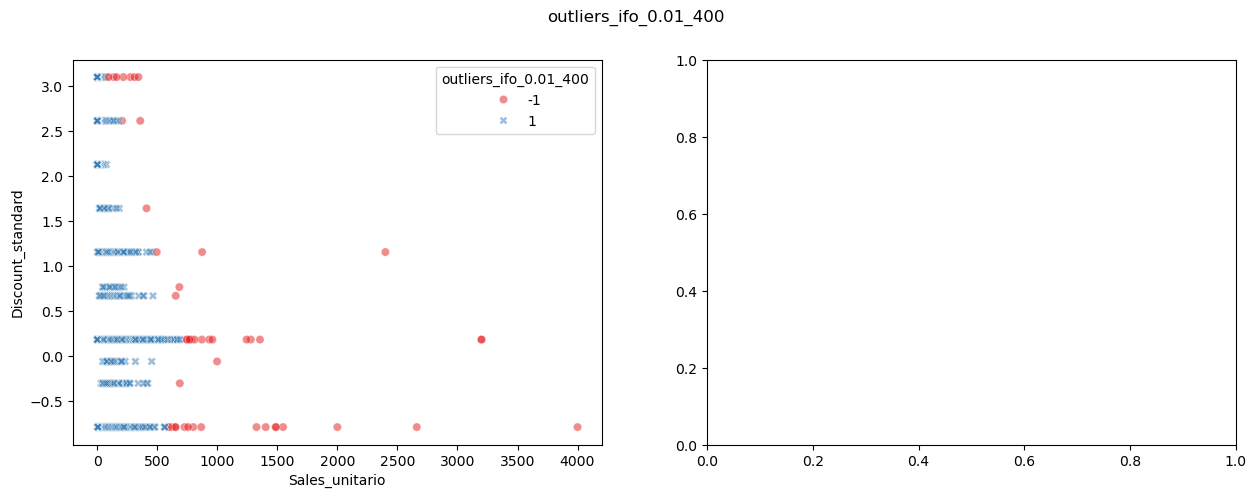

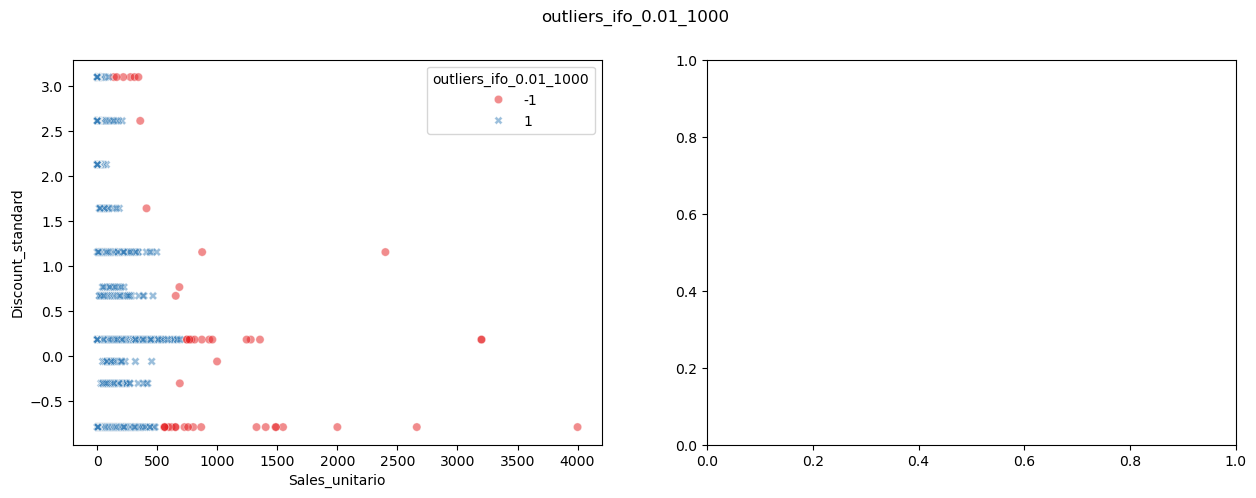

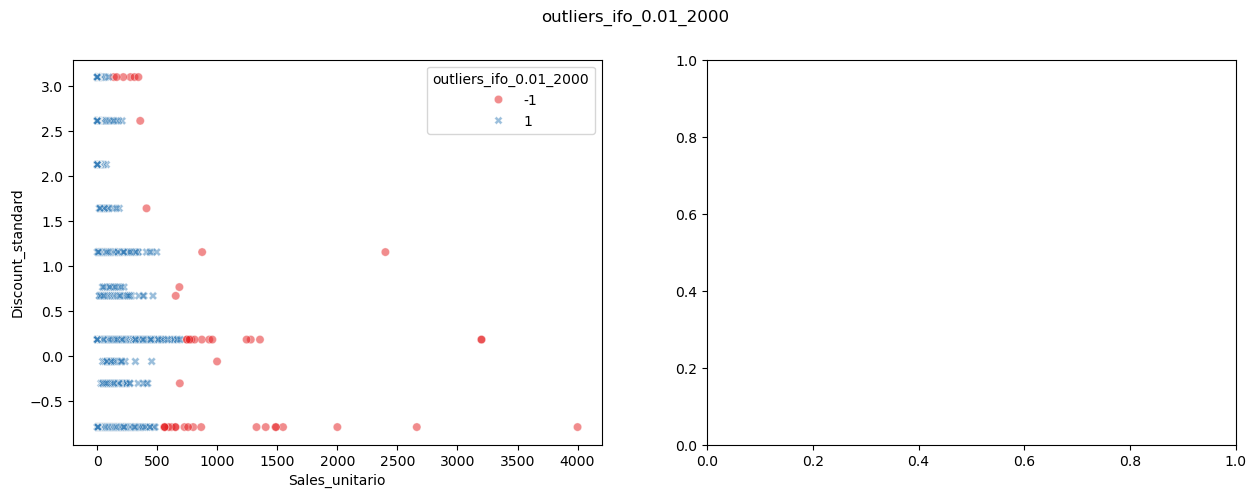

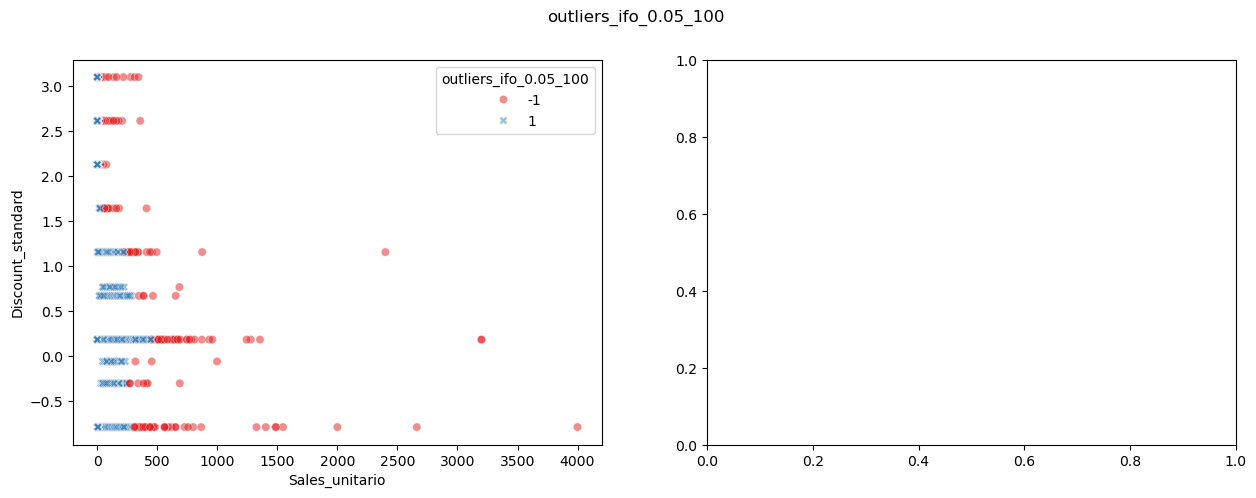

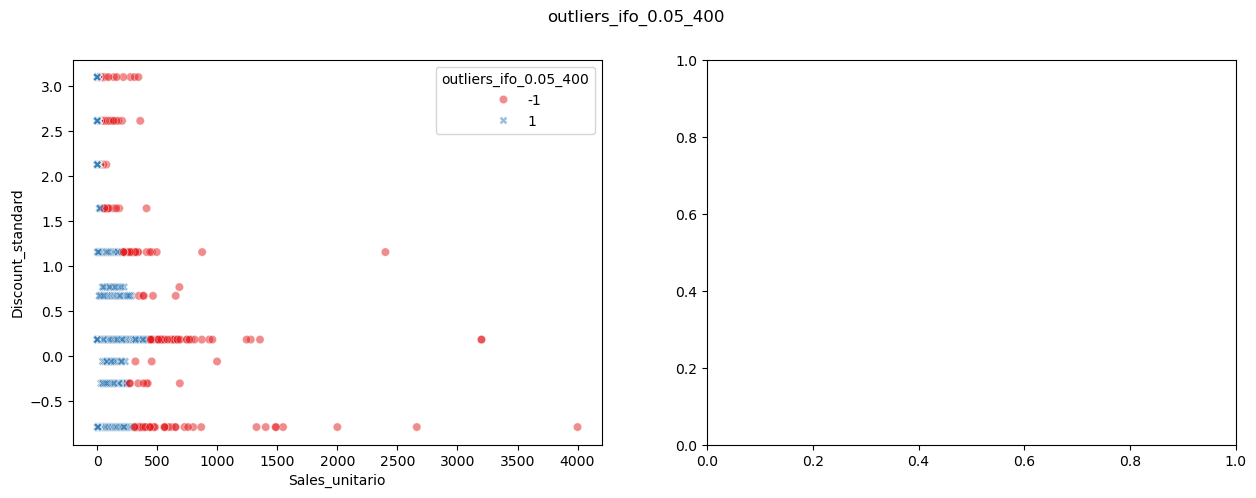

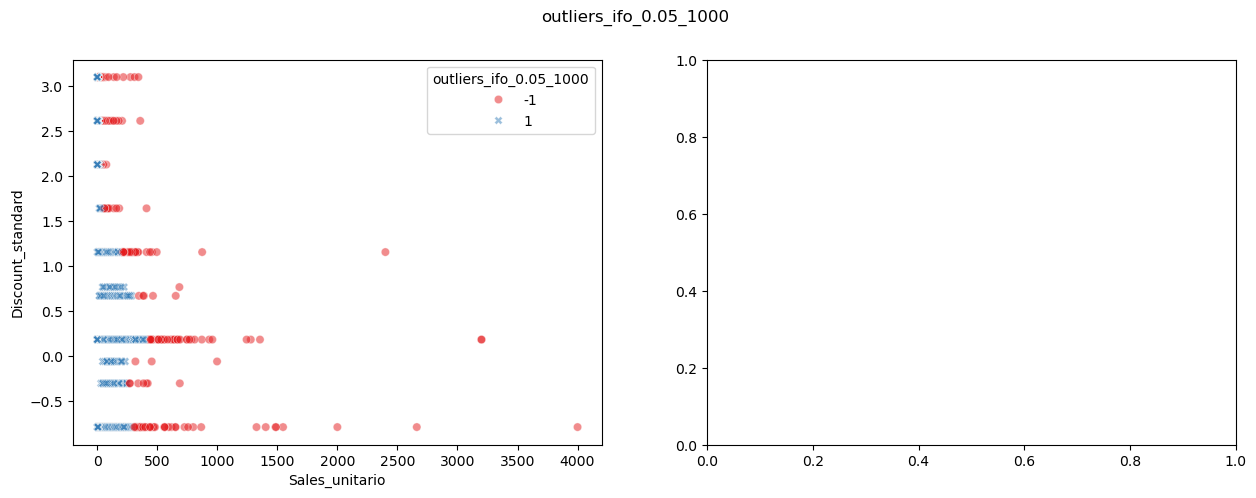

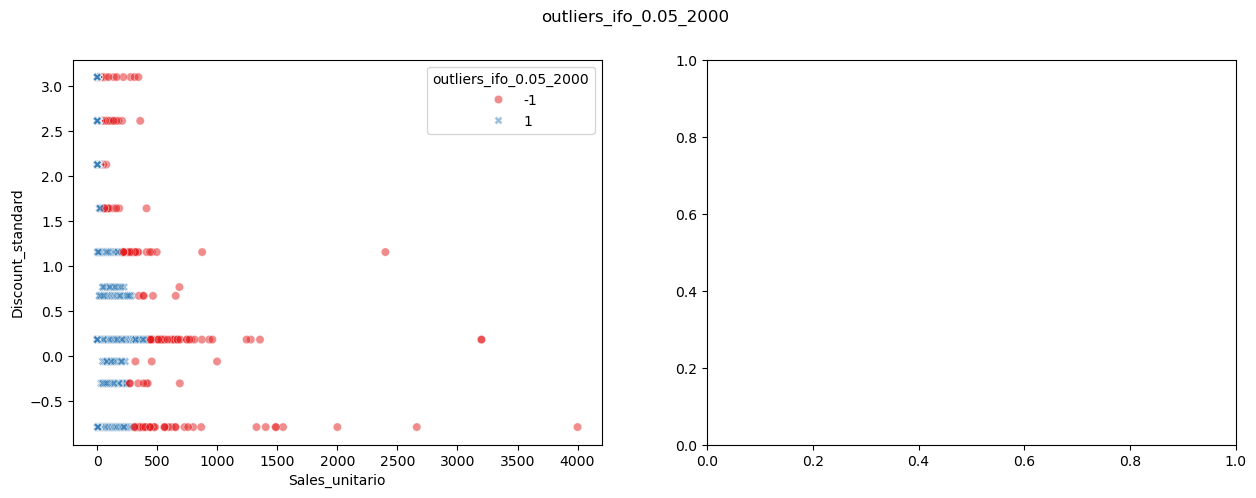

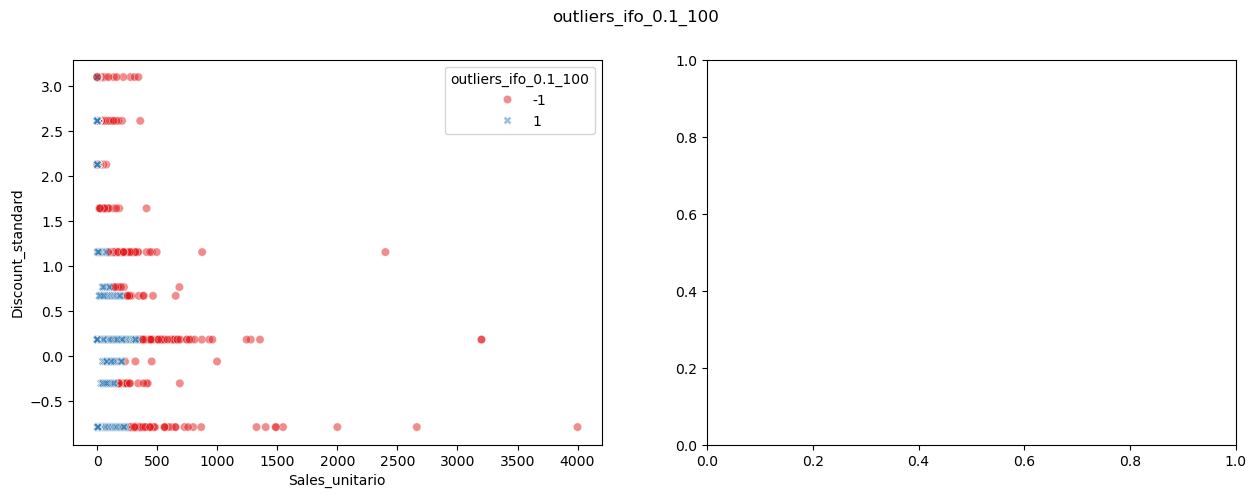

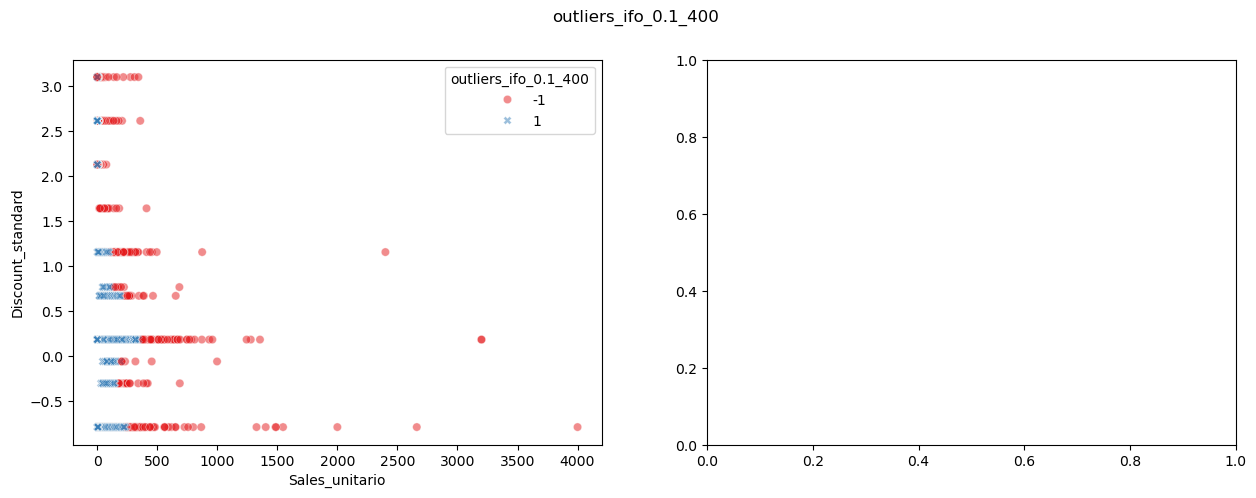

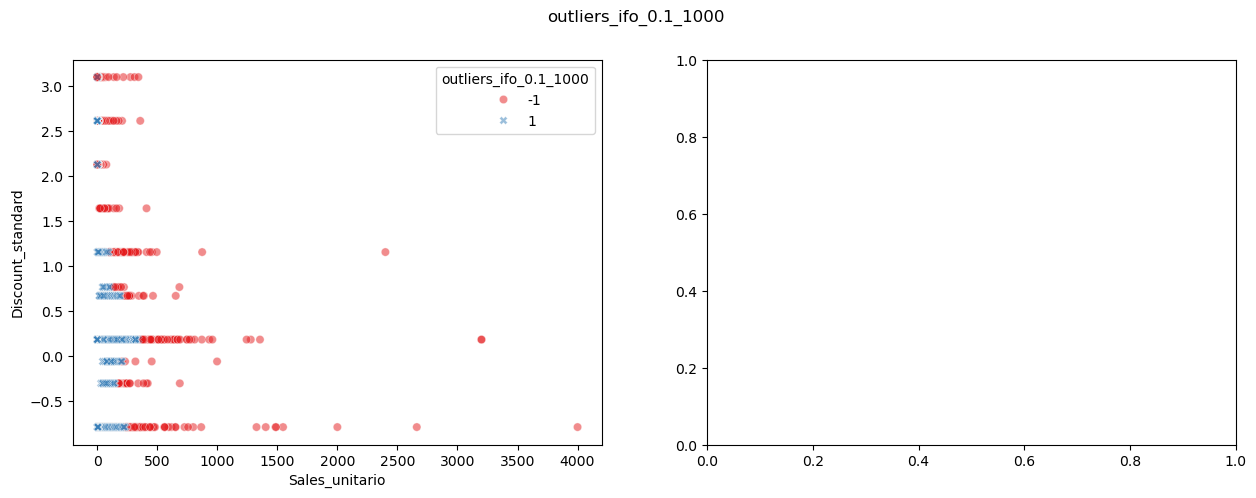

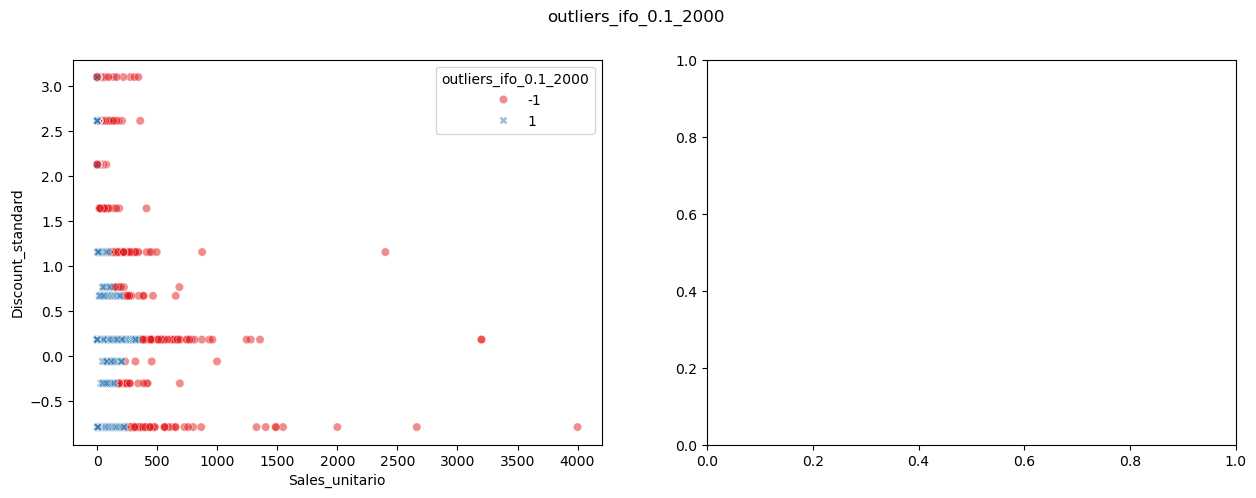

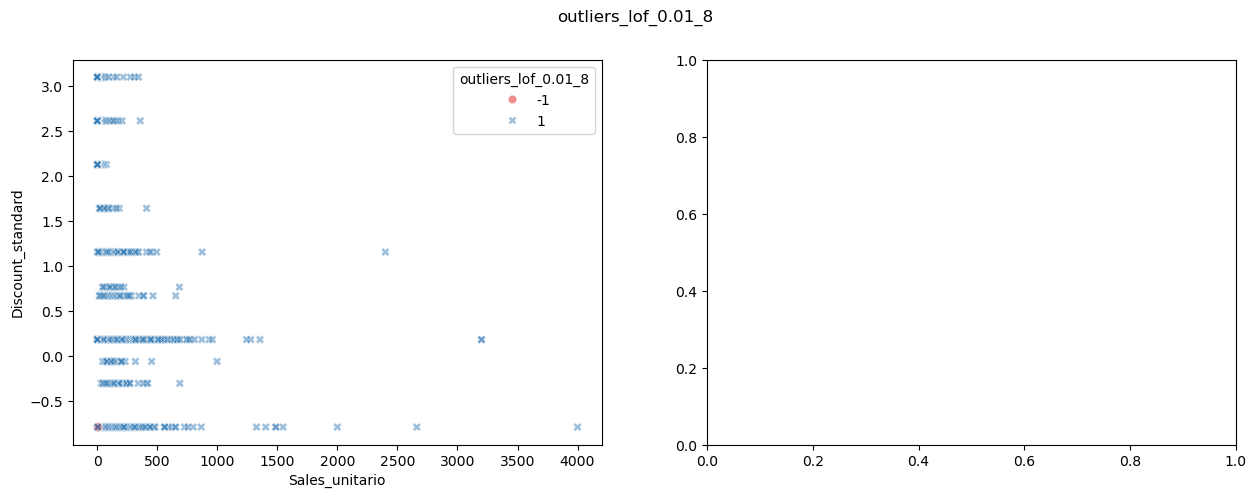

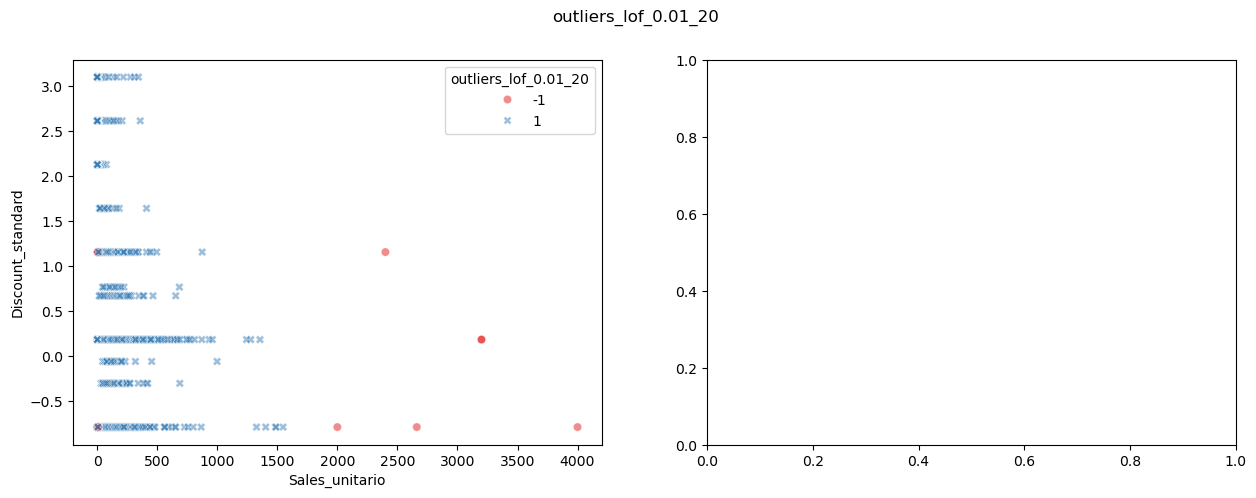

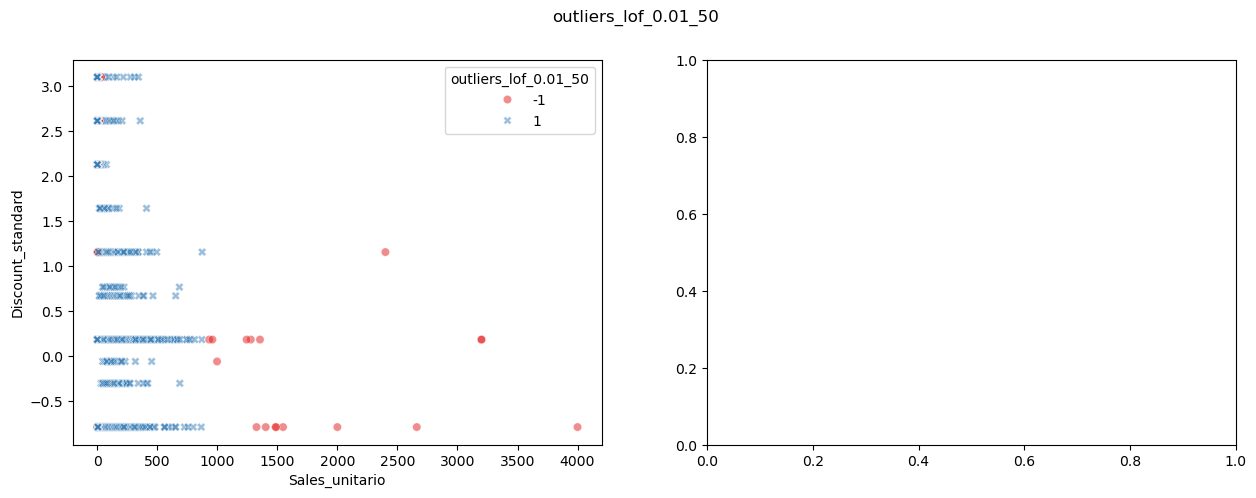

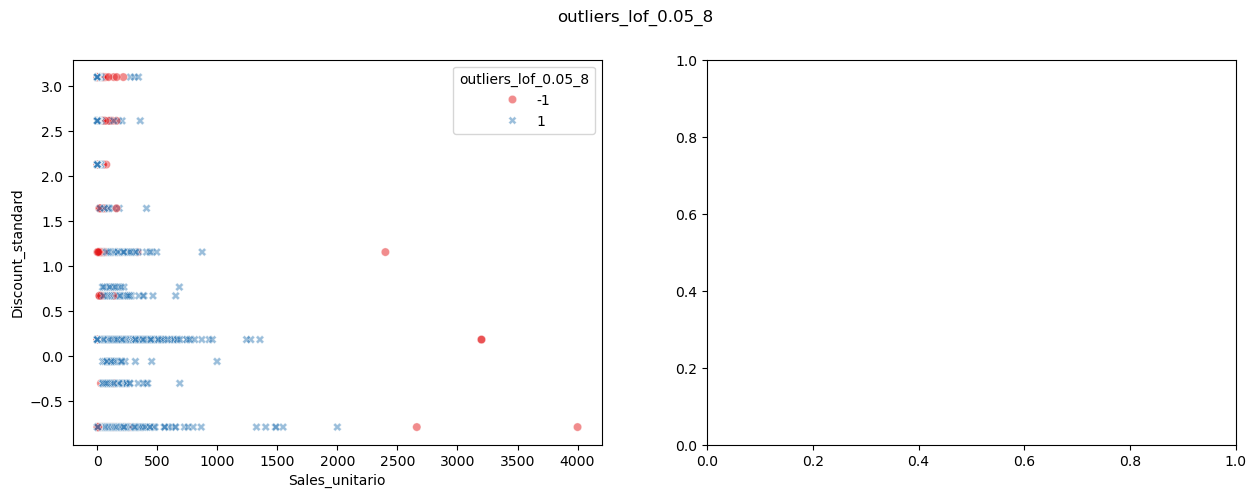

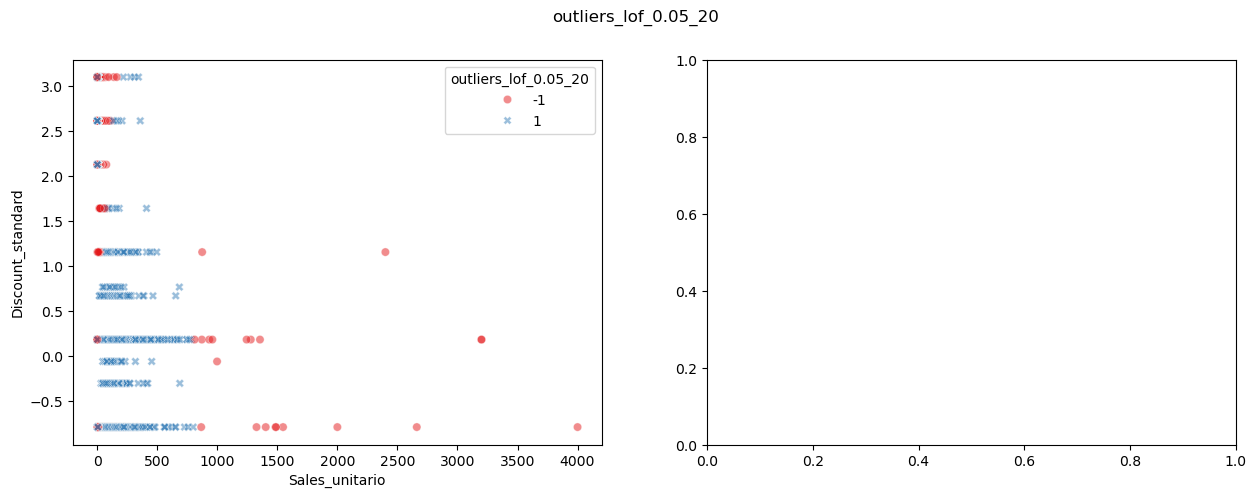

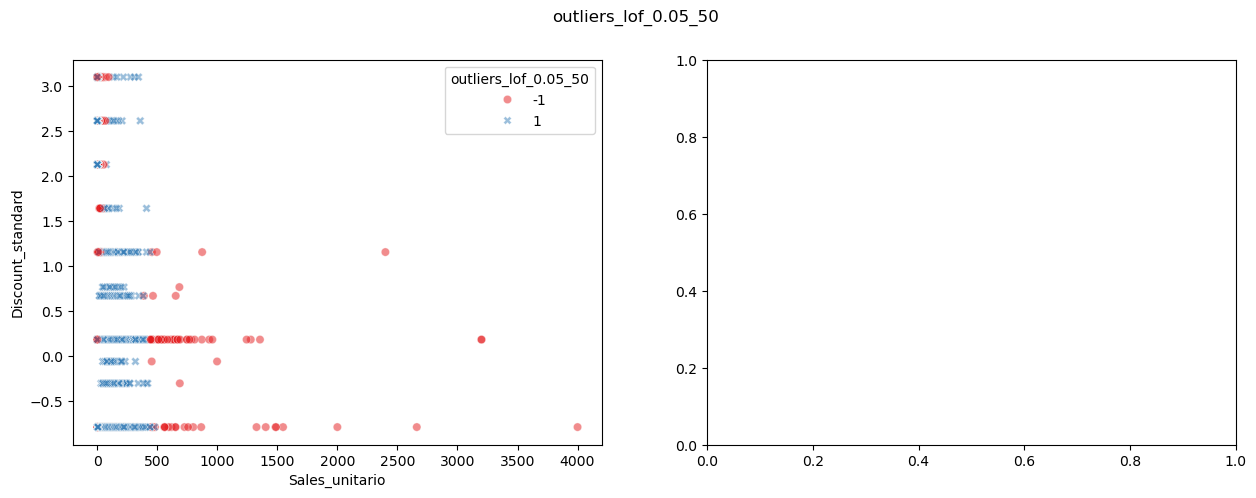

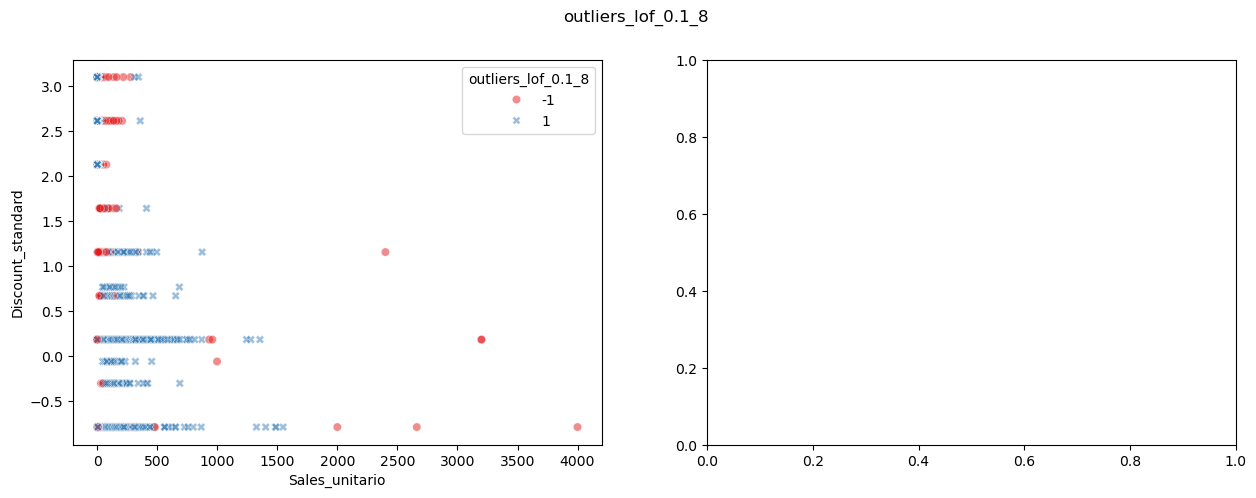

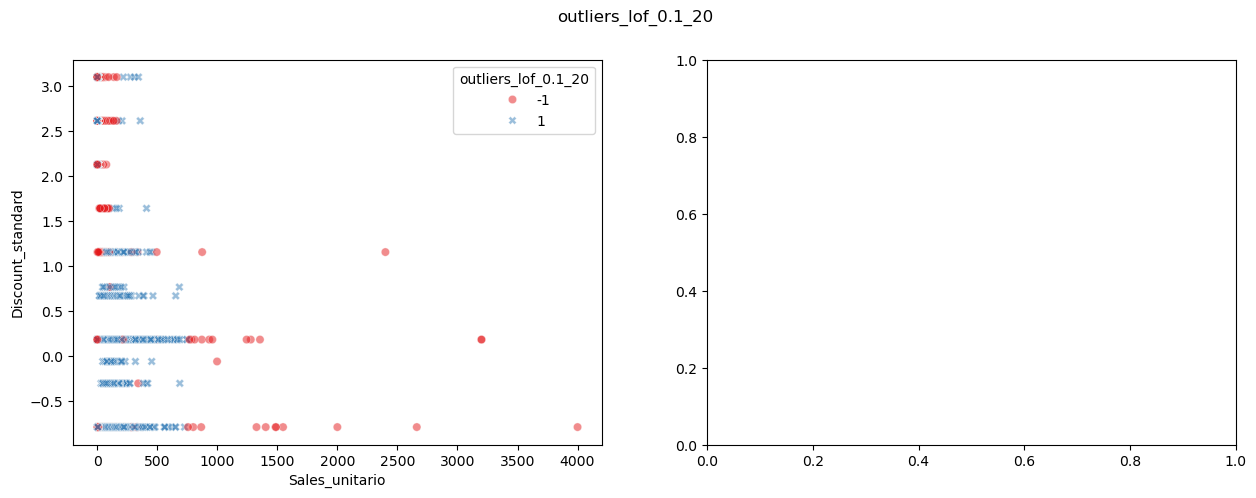

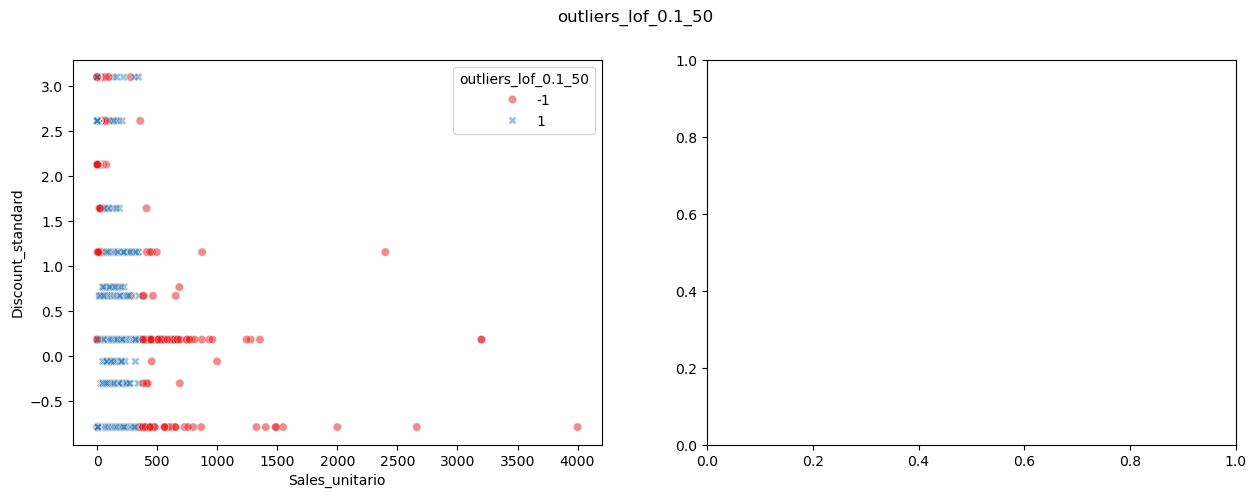

In [29]:
lista_contaminaciones = [0.01, 0.05, 0.1]
lista_neighbors = [8,20, 50]

combinaciones = list(product(lista_contaminaciones, lista_neighbors))
combinaciones


for cont, neighbors in tqdm(combinaciones):
    lof = LocalOutlierFactor(n_neighbors=neighbors,
                            contamination=cont,
                            n_jobs=-1)

    df_escaldo[f"outliers_lof_{cont}_{neighbors}"] = lof.fit_predict(df_escaldo[["Sales_unitario","Discount_standard"]])
    y_pred = lof.fit_predict(df_escaldo[["Sales_unitario","Discount_standard"]])
df_escaldo

#visualizacion
columnas_hue = df_escaldo.filter(like="outlier").columns

combinaciones_viz = list(combinations(["Sales_unitario","Discount_standard"], 2))
combinaciones_viz

for outlier in tqdm(columnas_hue):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15, 5))
    axes = axes.flat

    for indice, tupla in enumerate(combinaciones_viz):
        sns.scatterplot(x = tupla[0],
                        y = tupla[1],
                        ax = axes[indice],
                        data = df_escaldo,
                        hue=outlier,
                        palette="Set1",
                        style=outlier,
                        alpha=0.5)
        
    plt.suptitle(outlier)

Lo que saco en claro es que el nivel de contaminación más estricto (10%) es la mejor opción porque es el que más se acerca a la realidad de los datos.  

Tras observar los gráficos del LOF y el IFO observo que el IFO me marca como outliers justo los sales_unitarios y los descuentos que me chirriaban al explorar los outliers. Por ello me parece más adecuado hacer uso de la metodología IFO.


In [27]:
df_escaldo.columns

Index(['Sales_unitario', 'Ship Mode_First Class', 'Ship Mode_Same Day',
       'Ship Mode_Second Class', 'Ship Mode_Standard Class',
       'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office',
       'Quantity_entre 1 y 2', 'Quantity_entre 11 y 12',
       'Quantity_entre 13 y 14', 'Quantity_entre 13 y14',
       'Quantity_entre 3 y 4', 'Quantity_entre 5 y 6', 'Quantity_entre 7 y 8',
       'Quantity_entre 9 y 10', 'Order Priority_Critical',
       'Order Priority_High', 'Order Priority_Low', 'Order Priority_Medium',
       'month_April', 'month_August', 'month_December', 'month_February',
       'month_January', 'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'City_standard',
       'Category_standard', 'Sub-Category_standard', 'Discount_standard',
       'outliers_ifo_0.01_100', 'outliers_ifo_0.01_400',
       'outliers_ifo_0.01_1000', 'outliers_ifo_0.01_2000',
       'outliers_ifo_0.05_100', 'outliers_if

In [30]:
df_ifo=df_escaldo[['Sales_unitario', 'Ship Mode_First Class', 'Ship Mode_Same Day',
       'Ship Mode_Second Class', 'Ship Mode_Standard Class',
       'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office',
       'Quantity_entre 1 y 2', 'Quantity_entre 11 y 12',
       'Quantity_entre 13 y 14', 'Quantity_entre 13 y14',
       'Quantity_entre 3 y 4', 'Quantity_entre 5 y 6', 'Quantity_entre 7 y 8',
       'Quantity_entre 9 y 10', 'Order Priority_Critical',
       'Order Priority_High', 'Order Priority_Low', 'Order Priority_Medium',
       'month_April', 'month_August', 'month_December', 'month_February',
       'month_January', 'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'City_standard',
       'Category_standard', 'Sub-Category_standard', 'Discount_standard',
       'outliers_ifo_0.01_100', 'outliers_ifo_0.01_400',
       'outliers_ifo_0.01_1000', 'outliers_ifo_0.01_2000',
       'outliers_ifo_0.05_100', 'outliers_ifo_0.05_400',
       'outliers_ifo_0.05_1000', 'outliers_ifo_0.05_2000',
       'outliers_ifo_0.1_100', 'outliers_ifo_0.1_400', 'outliers_ifo_0.1_1000',
       'outliers_ifo_0.1_2000']]

In [31]:
df_ifo.head()

,Sales_unitario,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Quantity_entre 1 y 2,Quantity_entre 11 y 12,Quantity_entre 13 y 14,Quantity_entre 13 y14,Quantity_entre 3 y 4,Quantity_entre 5 y 6,Quantity_entre 7 y 8,Quantity_entre 9 y 10,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,City_standard,Category_standard,Sub-Category_standard,Discount_standard,outliers_ifo_0.01_100,outliers_ifo_0.01_400,outliers_ifo_0.01_1000,outliers_ifo_0.01_2000,outliers_ifo_0.05_100,outliers_ifo_0.05_400,outliers_ifo_0.05_1000,outliers_ifo_0.05_2000,outliers_ifo_0.1_100,outliers_ifo_0.1_400,outliers_ifo_0.1_1000,outliers_ifo_0.1_2000
0,307.953333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.334497,1.672617,-0.004291,-0.793320,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
1,497.445818,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.255158,1.672617,0.536741,0.180164,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,554.521600,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.032984,1.672617,0.536741,0.180164,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
3,799.988571,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.334497,1.672617,5.099690,-0.793320,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,871.536000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.334497,-0.777391,-0.404991,0.180164,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


Ahora me quito las que tengan todas las filas con -1 y así me quedo con todas las que al menos tienen un Outlier

In [32]:
columnasdf=df_escaldo.filter(like="outliers_ifo")
columnas_ifo=columnasdf.columns

In [33]:

filtered_df = df_ifo[(df_ifo[columnas_ifo] == -1).all(axis=1)]

In [36]:
filtered_df.head()

,Sales_unitario,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Quantity_entre 1 y 2,Quantity_entre 11 y 12,Quantity_entre 13 y 14,Quantity_entre 13 y14,Quantity_entre 3 y 4,Quantity_entre 5 y 6,Quantity_entre 7 y 8,Quantity_entre 9 y 10,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,City_standard,Category_standard,Sub-Category_standard,Discount_standard,outliers_ifo_0.01_100,outliers_ifo_0.01_400,outliers_ifo_0.01_1000,outliers_ifo_0.01_2000,outliers_ifo_0.05_100,outliers_ifo_0.05_400,outliers_ifo_0.05_1000,outliers_ifo_0.05_2000,outliers_ifo_0.1_100,outliers_ifo_0.1_400,outliers_ifo_0.1_1000,outliers_ifo_0.1_2000
3,799.988571,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.334497,1.672617,5.099690,-0.793320,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,871.536000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.334497,-0.777391,-0.404991,0.180164,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,1326.800000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.334497,1.672617,5.099690,-0.793320,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
11,1999.988571,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.334497,1.672617,5.099690,-0.793320,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
12,2399.993143,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.724660,1.672617,6.358428,1.153648,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [35]:
filtered_df.shape

(42, 48)

Al observar las filas que tienen todos los valores con -1 y observar que suponen una parte ínfima de los datos, se decide eliminarlos

In [37]:
df_result = df_ifo.drop(index = filtered_df.index)

In [38]:
df_result.reset_index(drop=True, inplace=True)

In [39]:
df_result.shape

(4493, 48)

Ahora seleccionamos el 60% de los outliers

In [40]:
proporcion = 0.6 * len(columnas_ifo)
df_outliers_60 = df_result[df_result[columnas_ifo].eq(-1).sum(axis=1) >= proporcion]


In [41]:
df_ifo.shape

(4535, 48)

In [42]:
df_outliers_60.shape

(170, 48)

Observamos Discount

In [43]:
df_outliers_60["Discount_standard"].shape

(170,)

In [47]:
len(df_outliers_60[df_outliers_60["Discount_standard"] > 3]["Discount_standard"])

31

In [46]:
df_outliers_60[df_outliers_60["Discount_standard"] > 2]["Discount_standard"].shape

(57,)

In [48]:
df_outliers_60[df_outliers_60["Discount_standard"] > 2]["Discount_standard"].unique()

array([2.61387463, 2.12713257, 3.10061669])

Estamos observando los valores mayores a 2 (aproximadamente a partir de 60% de descuento)

In [49]:
df_outliers_60.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 4054
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sales_unitario            170 non-null    float64
 1   Ship Mode_First Class     170 non-null    float64
 2   Ship Mode_Same Day        170 non-null    float64
 3   Ship Mode_Second Class    170 non-null    float64
 4   Ship Mode_Standard Class  170 non-null    float64
 5   Segment_Consumer          170 non-null    float64
 6   Segment_Corporate         170 non-null    float64
 7   Segment_Home Office       170 non-null    float64
 8   Quantity_entre 1 y 2      170 non-null    float64
 9   Quantity_entre 11 y 12    170 non-null    float64
 10  Quantity_entre 13 y 14    170 non-null    float64
 11  Quantity_entre 13 y14     170 non-null    float64
 12  Quantity_entre 3 y 4      170 non-null    float64
 13  Quantity_entre 5 y 6      170 non-null    float64
 14  Quantity_entre

In [50]:
df_outliers_60["Discount_standard"].min()

-0.7933197938969003

In [51]:
df_outliers_60["Discount_standard"].max()

3.100616689391725

In [56]:
df_outliers_60[df_outliers_60["Discount_standard"] > 3].shape

(31, 48)

In [53]:
df_outliers_60["Discount_standard"].shape

(170,)

Aqui quiero crear el intervalo de outliers con el que me voy a quedar.  
Dado que las viviendas con un valor de distancia mayor a 3 (un 70% de descuento aproximadamente) me las marca por lo general como outliers y dado que no hay muchas se eliminan, para el resto se tratará de imputar su valor.

In [58]:
df_outliers_60=df_outliers_60[df_outliers_60["Discount_standard"] < 3]

Ahora observamos los sales_unitarios que nos habían chirriado antes

In [73]:
df_outliers_60[df_outliers_60["Sales_unitario"] > 600]

,Sales_unitario,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Quantity_entre 1 y 2,Quantity_entre 11 y 12,Quantity_entre 13 y 14,Quantity_entre 13 y14,Quantity_entre 3 y 4,Quantity_entre 5 y 6,Quantity_entre 7 y 8,Quantity_entre 9 y 10,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,City_standard,Category_standard,Sub-Category_standard,Discount_standard,outliers_ifo_0.01_100,outliers_ifo_0.01_400,outliers_ifo_0.01_1000,outliers_ifo_0.01_2000,outliers_ifo_0.05_100,outliers_ifo_0.05_400,outliers_ifo_0.05_1000,outliers_ifo_0.05_2000,outliers_ifo_0.1_100,outliers_ifo_0.1_400,outliers_ifo_0.1_1000,outliers_ifo_0.1_2000
14,610.900364,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.032984,1.672617,6.358428,0.180164,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
15,621.831467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.724660,-0.777391,0.206970,0.180164,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
21,677.861333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.032984,-0.777391,-0.404991,0.180164,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
57,639.989333,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.255158,1.672617,6.358428,0.180164,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
75,639.989333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.032984,1.672617,6.358428,0.180164,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
289,667.722667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.255158,1.672617,0.536741,0.180164,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
312,667.722667,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.040086,1.672617,0.536741,0.180164,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
371,691.082667,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.255158,-0.777391,0.087391,0.180164,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1


No tiene sentido que haya carpetas (binders) que por comprar 1 unidad te cobren 1244 dólares al no ser que esa unidad sea un paquete de 100 carpetas o algo así y no parece porque en segmento hay tanto corporate (que tendría sentido) como consumer (que es donde ya no tiene tanto sentido)

In [64]:
df_outliers_60[df_outliers_60["Sales_unitario"] > 300].sample(4)

,Sales_unitario,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Quantity_entre 1 y 2,Quantity_entre 11 y 12,Quantity_entre 13 y 14,Quantity_entre 13 y14,Quantity_entre 3 y 4,Quantity_entre 5 y 6,Quantity_entre 7 y 8,Quantity_entre 9 y 10,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,City_standard,Category_standard,Sub-Category_standard,Discount_standard,outliers_ifo_0.01_100,outliers_ifo_0.01_400,outliers_ifo_0.01_1000,outliers_ifo_0.01_2000,outliers_ifo_0.05_100,outliers_ifo_0.05_400,outliers_ifo_0.05_1000,outliers_ifo_0.05_2000,outliers_ifo_0.1_100,outliers_ifo_0.1_400,outliers_ifo_0.1_1000,outliers_ifo_0.1_2000
47,509.083636,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.101908,1.672617,6.358428,0.180164,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
80,455.992000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.724660,1.672617,0.536741,1.153648,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
53,452.490667,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.040086,0.712590,1.239319,-0.793320,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
51,411.124000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.724660,0.712590,1.106759,1.640391,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [65]:
df_outliers_60[df_outliers_60["Sales_unitario"] > 300].shape

(87, 48)

In [70]:
df_outliers_60[df_outliers_60["Sales_unitario"] < 300].sample(3)

,Sales_unitario,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Quantity_entre 1 y 2,Quantity_entre 11 y 12,Quantity_entre 13 y 14,Quantity_entre 13 y14,Quantity_entre 3 y 4,Quantity_entre 5 y 6,Quantity_entre 7 y 8,Quantity_entre 9 y 10,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,City_standard,Category_standard,Sub-Category_standard,Discount_standard,outliers_ifo_0.01_100,outliers_ifo_0.01_400,outliers_ifo_0.01_1000,outliers_ifo_0.01_2000,outliers_ifo_0.05_100,outliers_ifo_0.05_400,outliers_ifo_0.05_1000,outliers_ifo_0.05_2000,outliers_ifo_0.1_100,outliers_ifo_0.1_400,outliers_ifo_0.1_1000,outliers_ifo_0.1_2000
766,79.285714,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.116157,0.712590,1.239319,1.640391,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
1418,34.598000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.724660,-0.777391,-0.404991,2.613875,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
1071,87.320000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.724660,0.712590,1.106759,1.640391,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1


Estos precios de carpetas (binders) si que tienen sentido (ej:8.21 etc)

In [71]:
(df_outliers_60["Sales_unitario"] <300).sum()

52

In [72]:
(df_outliers_60["Sales_unitario"] >300).sum()

87

In [74]:
df_outliers_60.shape

(139, 48)

Al ser la variable respuesta no la tocamos de momento

In [96]:
df_result.isna().sum()

Sales_unitario                0
Ship Mode_First Class         0
Ship Mode_Same Day            0
Ship Mode_Second Class        0
Ship Mode_Standard Class      0
Segment_Consumer              0
Segment_Corporate             0
Segment_Home Office           0
Quantity_entre 1 y 2          0
Quantity_entre 11 y 12        0
Quantity_entre 13 y 14        0
Quantity_entre 13 y14         0
Quantity_entre 3 y 4          0
Quantity_entre 5 y 6          0
Quantity_entre 7 y 8          0
Quantity_entre 9 y 10         0
Order Priority_Critical       0
Order Priority_High           0
Order Priority_Low            0
Order Priority_Medium         0
month_April                   0
month_August                  0
month_December                0
month_February                0
month_January                 0
month_July                    0
month_June                    0
month_March                   0
month_May                     0
month_November                0
month_October                 0
month_Se

In [76]:
df_result.loc[df_outliers_60.index, "Discount_standard"] = np.nan

In [97]:
df_result.isna().sum()

Sales_unitario                0
Ship Mode_First Class         0
Ship Mode_Same Day            0
Ship Mode_Second Class        0
Ship Mode_Standard Class      0
Segment_Consumer              0
Segment_Corporate             0
Segment_Home Office           0
Quantity_entre 1 y 2          0
Quantity_entre 11 y 12        0
Quantity_entre 13 y 14        0
Quantity_entre 13 y14         0
Quantity_entre 3 y 4          0
Quantity_entre 5 y 6          0
Quantity_entre 7 y 8          0
Quantity_entre 9 y 10         0
Order Priority_Critical       0
Order Priority_High           0
Order Priority_Low            0
Order Priority_Medium         0
month_April                   0
month_August                  0
month_December                0
month_February                0
month_January                 0
month_July                    0
month_June                    0
month_March                   0
month_May                     0
month_November                0
month_October                 0
month_Se

caso con iterative

In [78]:
df_numericas=df_result.select_dtypes(include=np.number)
df_numericas.drop(columns="Sales_unitario", inplace=True)
imputer_iterative= IterativeImputer()       #Aquí se puede poner el KNNImputer o el RandomForestRegressor
                                            #missing values es por si los nulos no estan como np.nan sino en texto por ejemplo (aunque lo suyo es limpiarlo en el EDA)
                                            #initial_strategy= "median" sirve para indicar que me lo haga con las medianas
iterative_imputado=imputer_iterative.fit_transform(df_numericas)   #como es solo para numericas se tiene que meter el df de numericas pero hay que definirlo otra vez porque hemos dropeado duplicados
df_iterativo=df_result.copy()
df_num_sin_nulos=pd.DataFrame(iterative_imputado, columns= df_numericas.columns)  #para que tenga los mismo nombres de columnas
df_iterativo[df_numericas.columns]= df_num_sin_nulos    #Con esto metemos todo el dataframe de las numericas sin nulos donde corresponda rellenando esos nulos

In [79]:
df_iterativo.isna().sum()

Sales_unitario              0
Ship Mode_First Class       0
Ship Mode_Same Day          0
Ship Mode_Second Class      0
Ship Mode_Standard Class    0
Segment_Consumer            0
Segment_Corporate           0
Segment_Home Office         0
Quantity_entre 1 y 2        0
Quantity_entre 11 y 12      0
Quantity_entre 13 y 14      0
Quantity_entre 13 y14       0
Quantity_entre 3 y 4        0
Quantity_entre 5 y 6        0
Quantity_entre 7 y 8        0
Quantity_entre 9 y 10       0
Order Priority_Critical     0
Order Priority_High         0
Order Priority_Low          0
Order Priority_Medium       0
month_April                 0
month_August                0
month_December              0
month_February              0
month_January               0
month_July                  0
month_June                  0
month_March                 0
month_May                   0
month_November              0
month_October               0
month_September             0
City_standard               0
Category_s

In [81]:
df_iterativo.columns

Index(['Sales_unitario', 'Ship Mode_First Class', 'Ship Mode_Same Day',
       'Ship Mode_Second Class', 'Ship Mode_Standard Class',
       'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office',
       'Quantity_entre 1 y 2', 'Quantity_entre 11 y 12',
       'Quantity_entre 13 y 14', 'Quantity_entre 13 y14',
       'Quantity_entre 3 y 4', 'Quantity_entre 5 y 6', 'Quantity_entre 7 y 8',
       'Quantity_entre 9 y 10', 'Order Priority_Critical',
       'Order Priority_High', 'Order Priority_Low', 'Order Priority_Medium',
       'month_April', 'month_August', 'month_December', 'month_February',
       'month_January', 'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'City_standard',
       'Category_standard', 'Sub-Category_standard', 'Discount_standard',
       'outliers_ifo_0.01_100', 'outliers_ifo_0.01_400',
       'outliers_ifo_0.01_1000', 'outliers_ifo_0.01_2000',
       'outliers_ifo_0.05_100', 'outliers_if

In [82]:
df_sinout=df_iterativo[['Sales_unitario', 'Ship Mode_First Class', 'Ship Mode_Same Day',
       'Ship Mode_Second Class', 'Ship Mode_Standard Class',
       'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office',
       'Quantity_entre 1 y 2', 'Quantity_entre 11 y 12',
       'Quantity_entre 13 y 14', 'Quantity_entre 13 y14',
       'Quantity_entre 3 y 4', 'Quantity_entre 5 y 6', 'Quantity_entre 7 y 8',
       'Quantity_entre 9 y 10', 'Order Priority_Critical',
       'Order Priority_High', 'Order Priority_Low', 'Order Priority_Medium',
       'month_April', 'month_August', 'month_December', 'month_February',
       'month_January', 'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'City_standard',
       'Category_standard', 'Sub-Category_standard', 'Discount_standard']]

In [83]:
df_sinout.to_csv("..\..\..\datos\datos1\datos_clusterizados1_encoded_sinout.csv")

In [84]:
df_filt_it=df_sinout[["Sales_unitario", "Discount_standard"]]

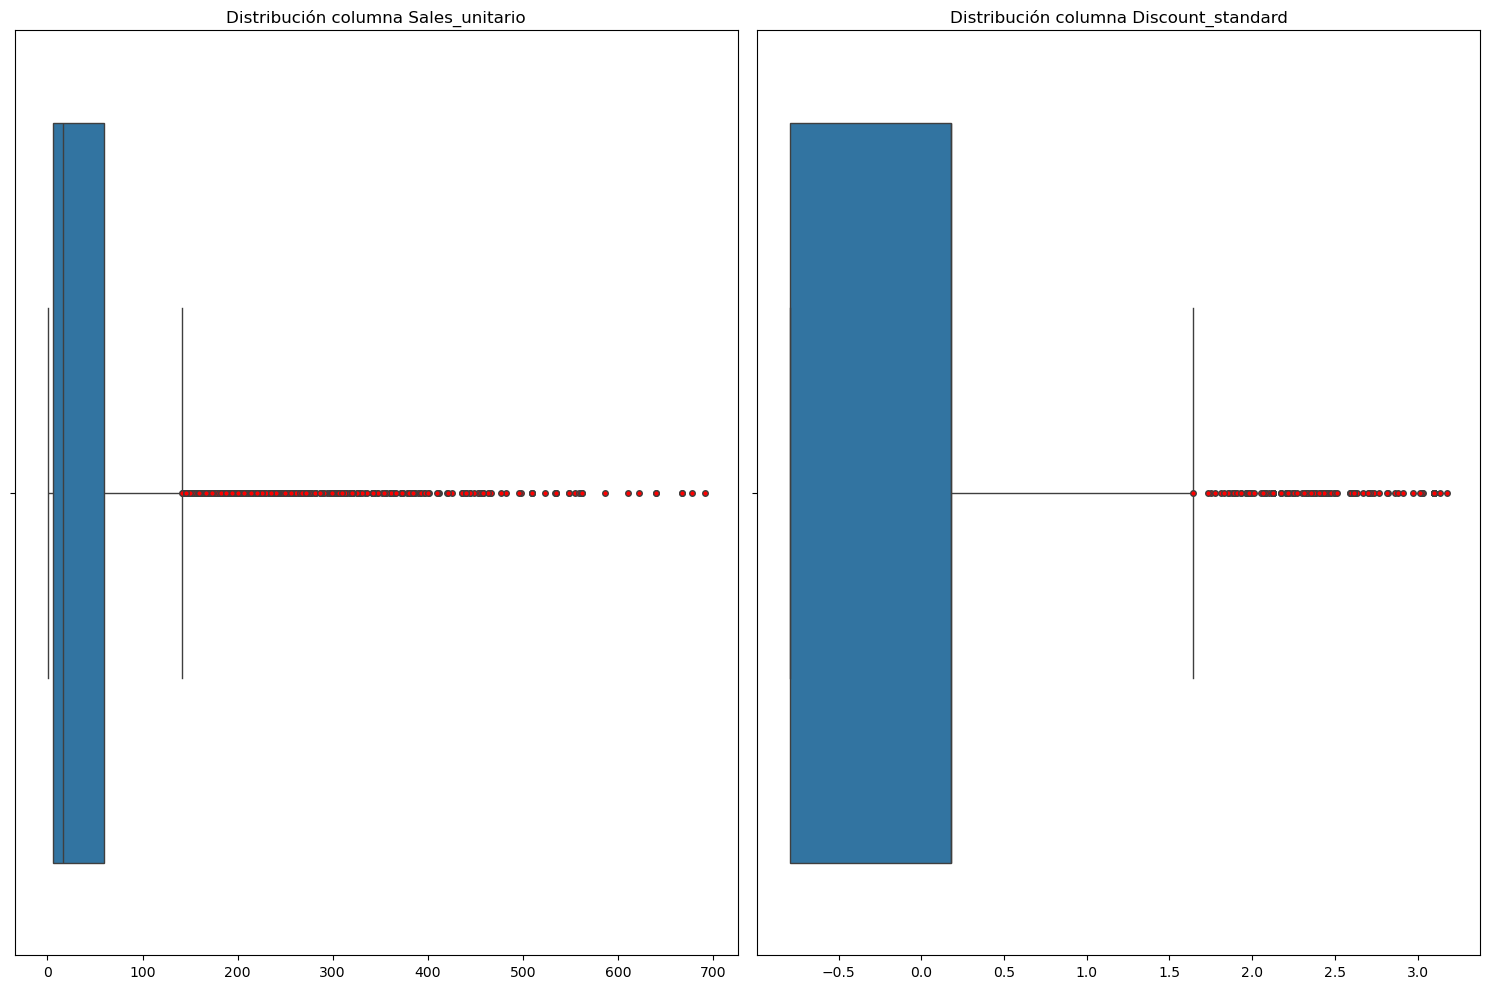

In [85]:
f.plot_outliers_univariados(df_filt_it, "b", (15,10))

In [87]:
df_est_con3=df_escaldo[["Sales_unitario", "Discount_standard"]]

In [94]:
(df_filt_it["Discount_standard"] > 3).sum()

174

In [93]:
(df_est_con3["Discount_standard"] > 3).sum()

174

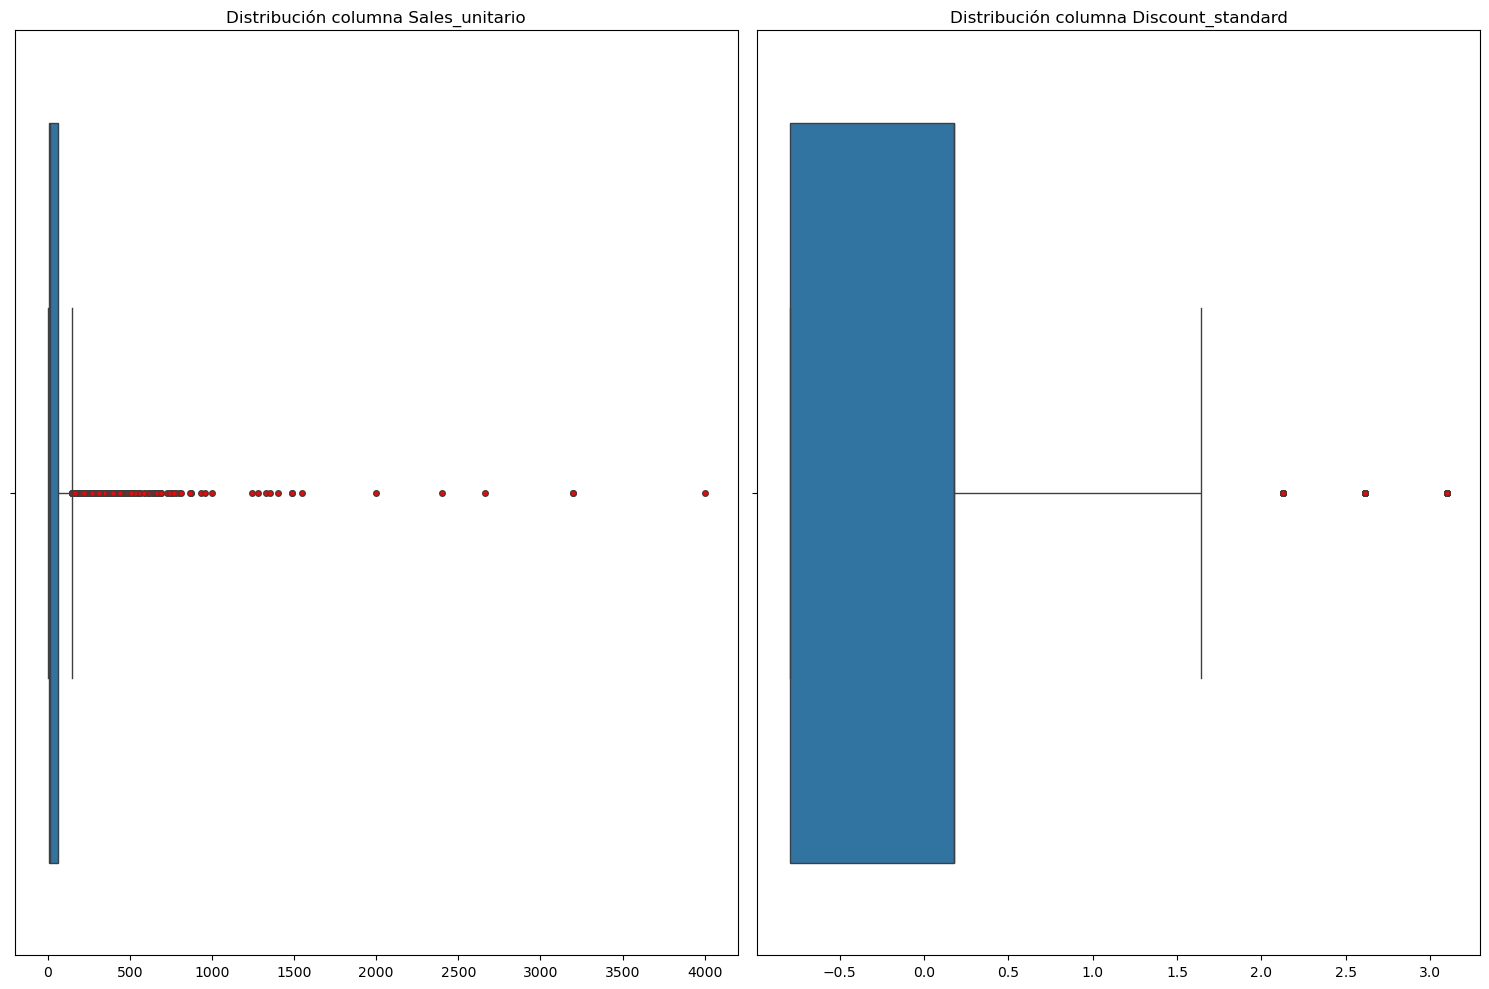

In [95]:
f.plot_outliers_univariados(df_est_con3, "b", (15,10))

<!-- Observamos que no hay diferencias muy significativas entre imputar con KNN o con ITERATIVE pero tras observar que el iterative reduce la dispersión entre la media y la mediana de size y que el KNN aumenta la desviación típica (variabilidad) en la distancia, nos decantamos finalmente por el uso del ITERATIVE -->